ModuleNotFoundError: No module named 'matplotlib'

In [2]:
!pip install matplotlib

ModuleNotFoundError: No module named 'matplotlib'

In [5]:
!pip install inline

  Created wheel for inline: filename=inline-0.0.1-cp37-none-any.whl size=3316 sha256=fd1021c91f6e99b3a0ab6b34a2a9e76159c27abab83793edb83f401793530205
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\3d\22\5a\3cd6585c9bfa846bd65da2d3555464151af10cafa949f82b92
Successfully built inline


In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [7]:
!pip install --upgrade matplotlib

  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)

In [11]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


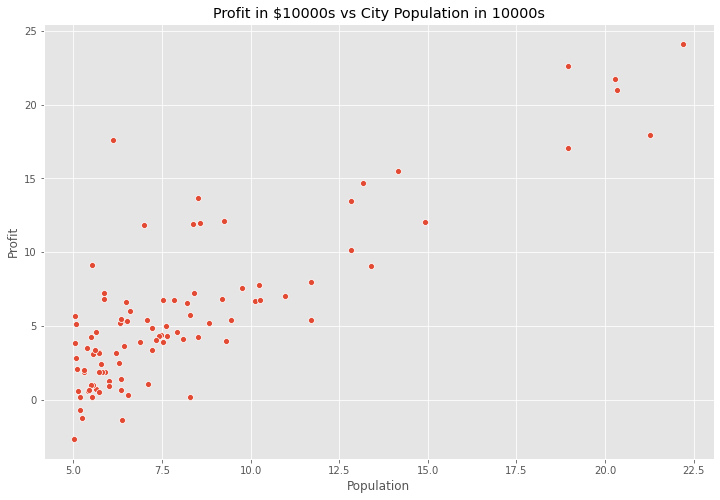

In [15]:
ax = sns.scatterplot(x='Population', y='Profit', data = data)
ax.set_title("Profit in $10000s vs City Population in 10000s");

In [17]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) **2
    
    return 1/(2*m) * np.sum(error)

In [18]:
m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis = 1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2, 1))
cost_function(X, y, theta)

32.072733877455676

In [19]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
    return theta, costs
        

In [20]:
theta, costs = gradient_descent(X, y, theta, alpha = 0.01, iterations = 2000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18x1


In [21]:
!pip install mpl_tollkits

ERROR: Could not find a version that satisfies the requirement mpl_tollkits (from versions: none)
ERROR: No matching distribution found for mpl_tollkits


In [22]:
!pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [26]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)
cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

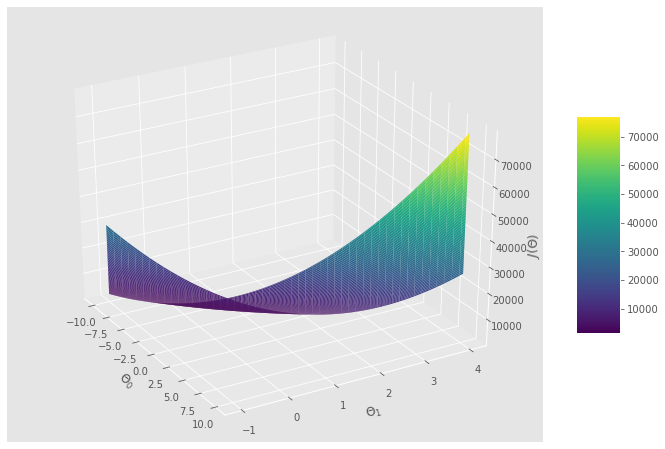

In [27]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis' )
fig.colorbar(surf, shrink = 0.5, aspect =5)
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 330)
plt.show()

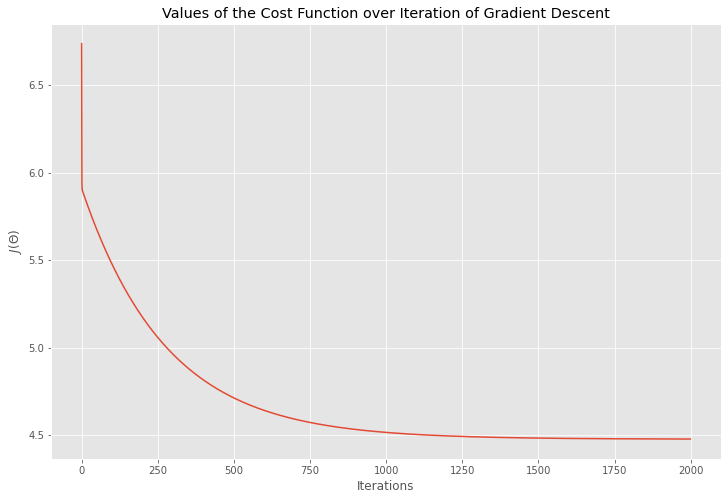

In [29]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iteration of Gradient Descent");


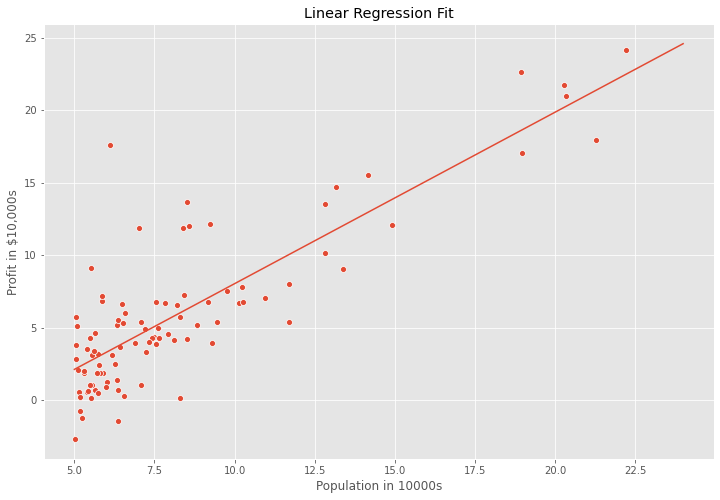

In [30]:
theta = np.squeeze(theta)
sns.scatterplot(x="Population", y="Profit", data=data)

x_value = [x for x in range(5,25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit");


In [34]:
 def predict(x, theta):
        y_pred = np.dot(theta.transpose(), x)
        return y_pred

In [37]:
y_pred_1 = predict(np.array([1,8.3]), theta) * 10000
print("For a population of 83,000 people, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 83,000 people, the model predicts a profit of $60243.0
